# MT1 take-home questions
## To be finished and uploaded on Canvas


This is the take-home part due 9/27/24 midnight on Canvas (CDS times vary).  

For the take-home, only the class material is allowed.
Use of external tools, Youtube, ChatGPT etc is not allowed.

You are not permitted to talk to anyone about the take-home.

**-------------------------------------------------------------------------------------**

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.Def_NFA    import *
from jove.Def_RE2NFA import *
from jove.LangDef    import *  # for testing DFA actions using nthnumeric if needed
from jove.Def_NFA2RE import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 6593, done.
remote: Counting objects: 100% (1959/1959), done.
remote: Compressing objects: 100% (829/829), done.
remote: Total 6593 (delta 1183), reused 1762 (delta 1050), pack-reused 4634 (from 1)
Receiving objects: 100% (6593/6593), 10.54 MiB | 6.90 MiB/s, done.
Resolving deltas: 100% (4188/4188), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(flTup)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)

##  Q1: Define a DFA for the language of strings over {a,b} where

* every block of length four or more has,
* for each four consecutive positions in that block
* an odd number of b's. The number of a's does not matter.

### Use the method of complementing these conditions and then building the RE for it (STEP-1)

### and then a minimal DFA (STEP-2)

## Note that if the block is of length 3 or less, no constraint is placed on the number of a's and b's.
### Document your approach in 2 clear sentences.

# SOLUTION BY STUDENT for STEP-1



**Solution:** I'll define an RE for every sequence of 4 characters with an even amount of b's, then allow that to be anywhere in the string. Then I'll OR it with a case for having 3 or fewer characters.

In [32]:
# We just need to find the RE for any set of 4 characters having even amounts of b's

# Here I am ORing every possibility for a set of 4 characters with even b's
RE_blocks_with_even_bs = " ((" + ")+(".join([
    "aaaa", # Only string with 0 b's
    "bbbb", # Only string with 4,
    "bbaa", # there are 4 choose 2 = 6 ways to organize 2 a's and 2 b's
    "baba",
    "baab",
    "abba",
    "abab",
    "aabb"
]) + ")) "

# So the final RE accepts strings with this somewhere inside
RE_sigma_star = "(a+b)*"
RE_some_block_has_even_bs = RE_sigma_star + RE_blocks_with_even_bs + RE_sigma_star
RE_some_block_has_even_bs

'(a+b)* ((aaaa)+(bbbb)+(bbaa)+(baba)+(baab)+(abba)+(abab)+(aabb)) (a+b)*'

# STEP-2 here

In [33]:
# The DFA desired is now in one shot -- the student writes it in one shot
DFA_desired = min_dfa(comp_dfa(nfa2dfa(re2nfa(RE_some_block_has_even_bs))))

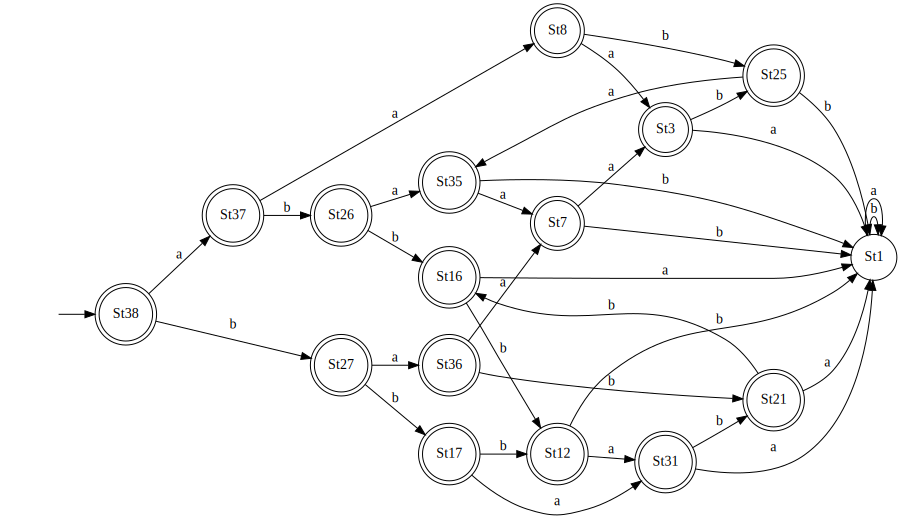

In [34]:
# The student draws
dotObj_dfa(DFA_desired)

In [ ]:
# When all looks good, uncomment this cell + all render cells below, and run all cells again! Then collect the PDFs
# dotObj_dfa(DFA_desired).render('DFA_desired')

#  Q2: Now, separately specify an RE for the set of strings with an odd number of b's and look at its minimal DFA (STEP-3)

# Then build a minimal DFA for the intersection of this RE's DFA and  DFA_desired (STEP-4)

# Noting down which state(s) got merged (STEP-5)

# And justify your final answer (STEP-6) by testing

# STEP-3 below

In [40]:
# The student writes the RE for STEP-3
# Explanation: We can have a's dotted anywhere throughout, including at the start, but all b's after the first one must come in pairs.
RE_odd_bs = "a* b (a*ba*ba*)*"

# The student obtains the min DFA in one shot to check the work - as part of STEP-3
minD_RE_odd_bs = min_dfa(nfa2dfa(re2nfa(RE_odd_bs)))

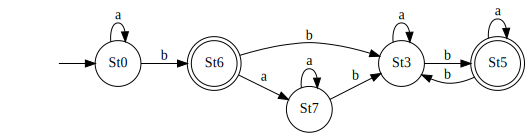

In [41]:
dotObj_dfa(minD_RE_odd_bs)

In [ ]:
# Uncomment for final run
# dotObj_dfa(minD_RE_odd_bs).render('minD_RE_odd_bs')

# STEP-4 below

In [42]:
# The student intersects minD_RE_odd_bs and DFA_desired

D_int = intersect_dfa(minD_RE_odd_bs, DFA_desired)

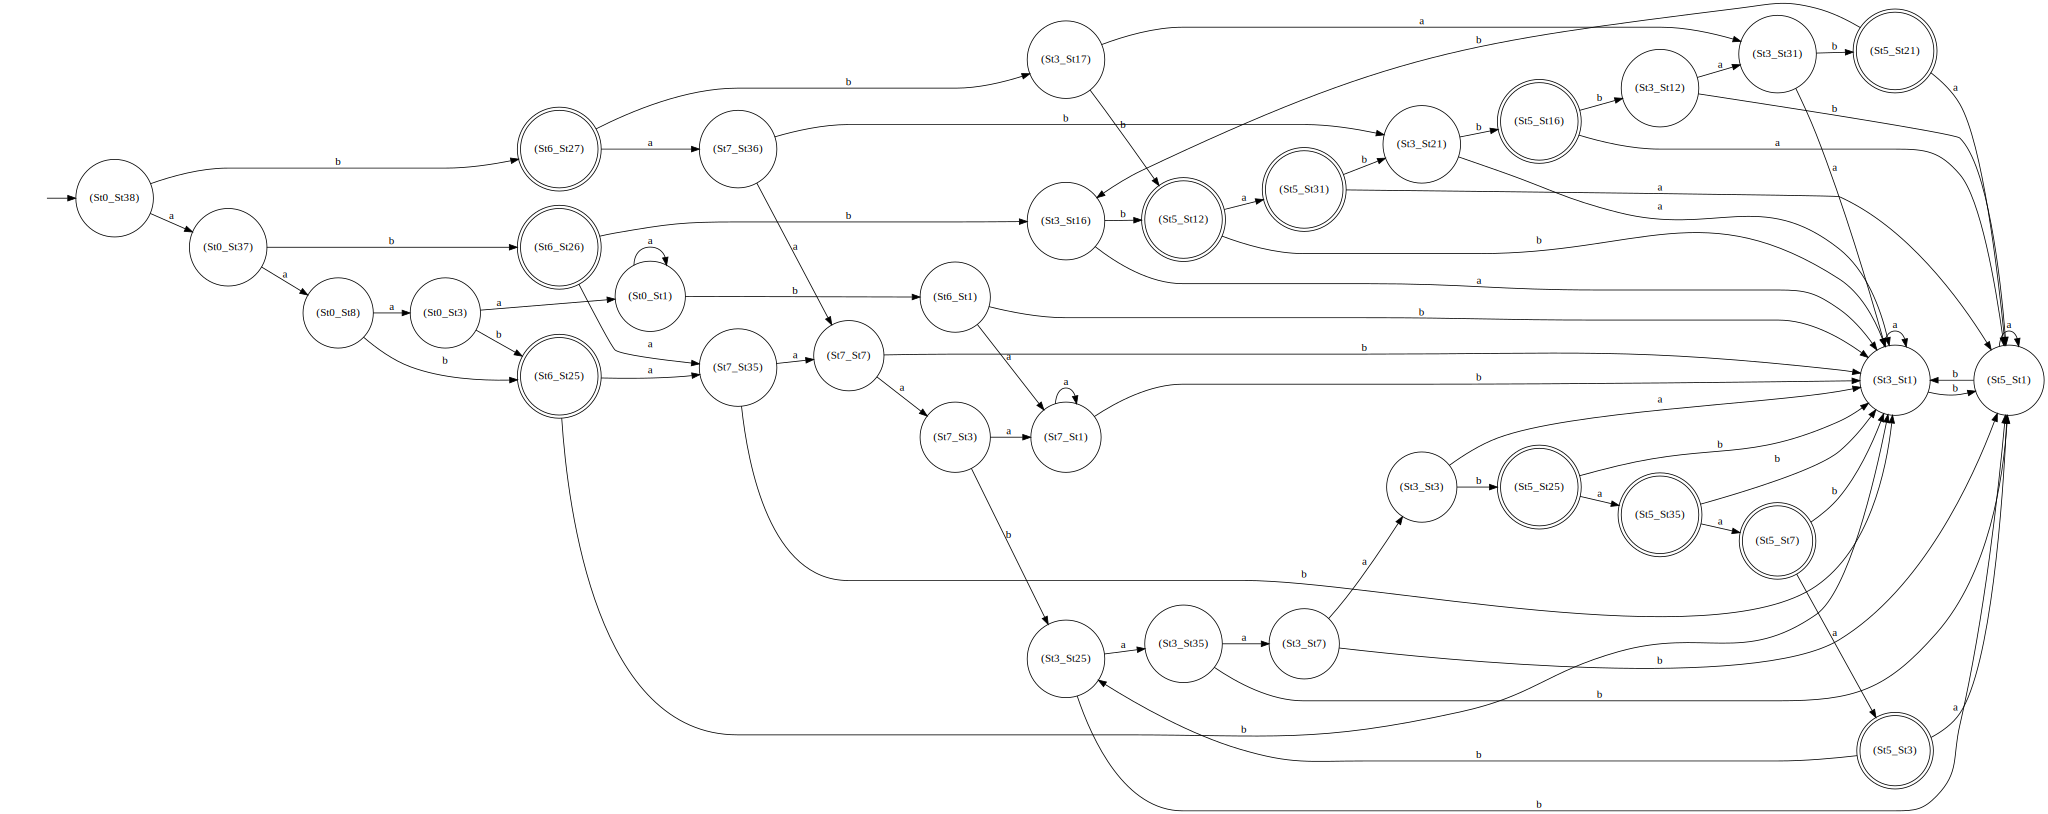

In [43]:
# The student draws this DFA
dotObj_dfa(D_int)

In [ ]:
# Uncomment for final run
# dotObj_dfa(D_int).render('D_int')

In [44]:
# The student minimizes D_int

min_D_int = min_dfa(D_int)

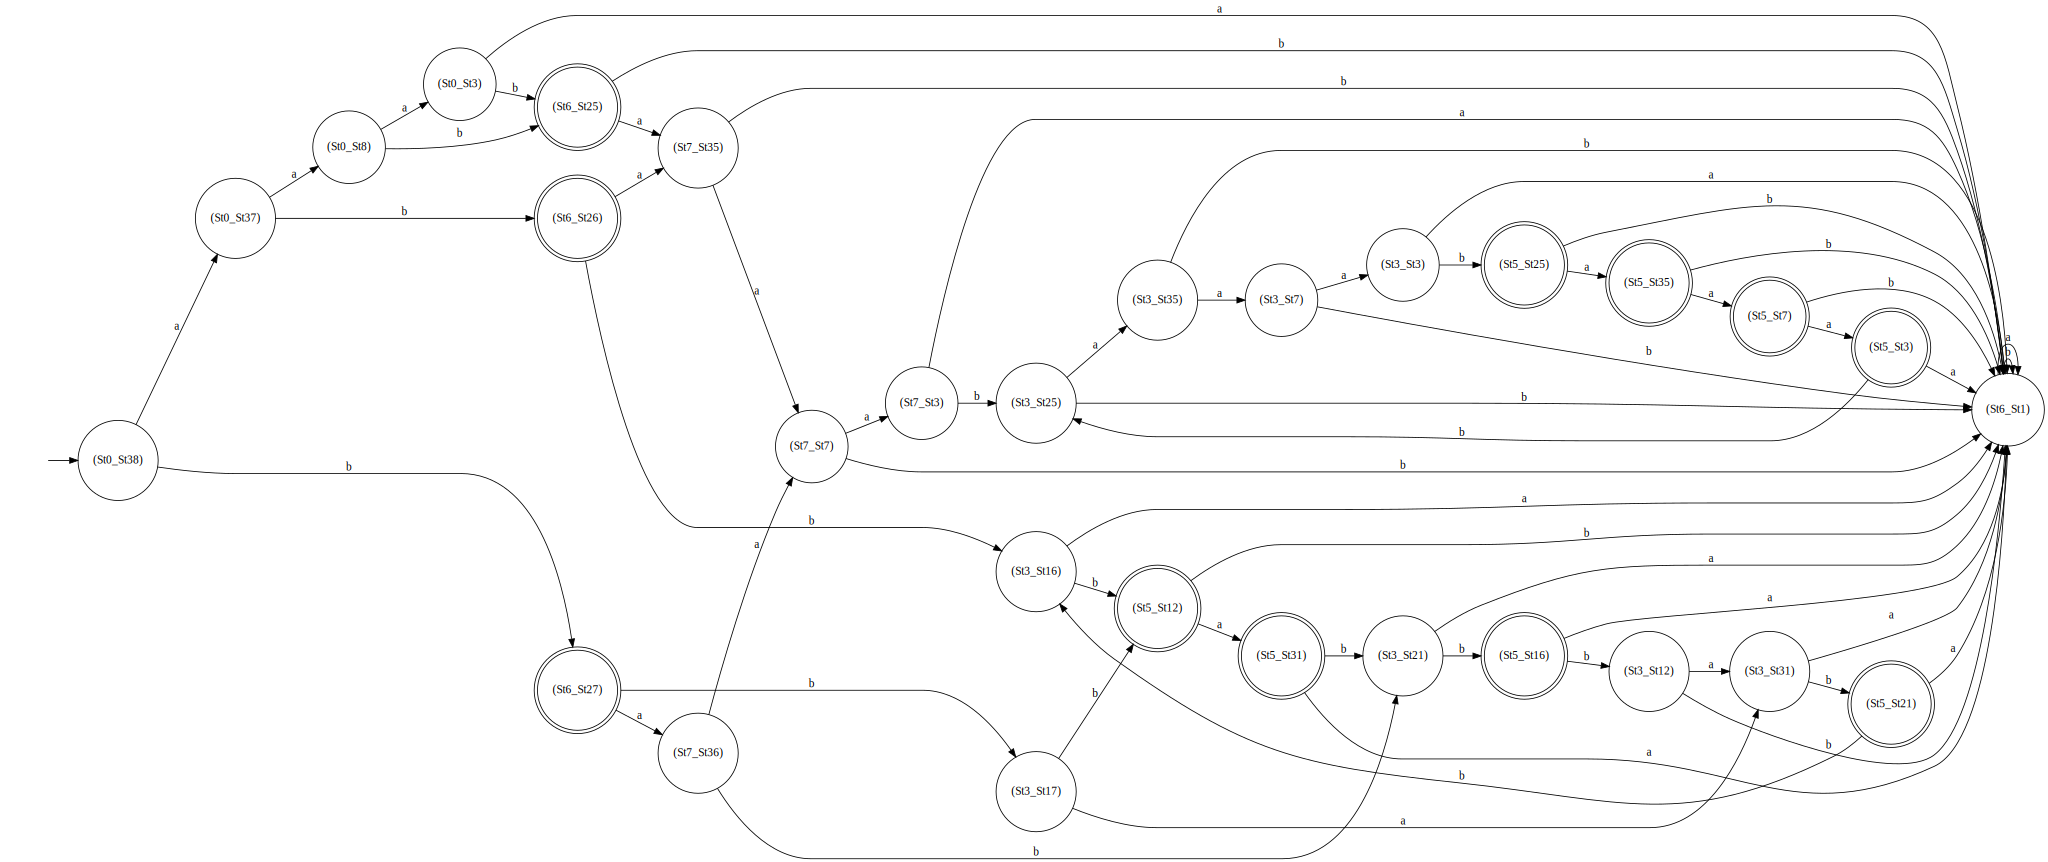

In [45]:
# The student draws min_D_int

dotObj_dfa(min_D_int)

In [ ]:
# Uncomment for final run
# dotObj_dfa(min_D_int).render('min_D_int')

### STEP-5: Find out the NUMBER OF pairs of state(s) merged

In [46]:
merged_states = len(D_int["Q"]) - len(min_D_int["Q"])

merged_states

4

In [47]:
len(min_D_int["Q"])

29

In [48]:
len(D_int["Q"])

33

In [52]:
[ q for q in D_int["Q"] if q not in min_D_int["Q"] ]

[('St5', 'St1'), ('St7', 'St1'), ('St0', 'St1'), ('St3', 'St1')]

# STEP-5 answer below

... THESE STATE-PAIRS GOT MERGED...

... USE AS MANY...

FIRST PAIR : St5, St1

SECOND PAIR : St7, St1

THIRD PAIR : St0, St1

FOURTH PAIR : St3, St1

# STEP-6 BELOW

# The student generates numeric order strings in range 128 following outline in Overview_of_CS3100 in module 00_...

In [53]:
TestStrings = [nthnumeric(i, ['a','b']) for i in range(128)]

# The student finds out accept/reject

In [54]:

for test in TestStrings:
    if accepts_dfa(D_int, test):
        print("DFA D_int accepts ", test)
    else:
        print("DFA D_int rejects ", test)

DFA D_int rejects  
DFA D_int rejects  a
DFA D_int accepts  b
DFA D_int rejects  aa
DFA D_int accepts  ab
DFA D_int rejects  ba
DFA D_int rejects  bb
DFA D_int rejects  aaa
DFA D_int accepts  aab
DFA D_int rejects  aba
DFA D_int rejects  abb
DFA D_int rejects  baa
DFA D_int rejects  bab
DFA D_int rejects  bba
DFA D_int accepts  bbb
DFA D_int rejects  aaaa
DFA D_int accepts  aaab
DFA D_int rejects  aaba
DFA D_int rejects  aabb
DFA D_int rejects  abaa
DFA D_int rejects  abab
DFA D_int rejects  abba
DFA D_int accepts  abbb
DFA D_int rejects  baaa
DFA D_int rejects  baab
DFA D_int rejects  baba
DFA D_int accepts  babb
DFA D_int rejects  bbaa
DFA D_int accepts  bbab
DFA D_int accepts  bbba
DFA D_int rejects  bbbb
DFA D_int rejects  aaaaa
DFA D_int rejects  aaaab
DFA D_int rejects  aaaba
DFA D_int rejects  aaabb
DFA D_int rejects  aabaa
DFA D_int rejects  aabab
DFA D_int rejects  aabba
DFA D_int rejects  aabbb
DFA D_int rejects  abaaa
DFA D_int rejects  abaab
DFA D_int rejects  ababa
DFA D_i

# The student explains below that this answer is correct - one sentence after "why". IN STEP-6

DFA D_int accepts  bbabbb - There are no substrings of bbabbb of length 4 that contain an even number of b's; "bbab", "babb", and "abbb" all contain 3.

DFA D_int rejects  bbbaaa - This contains "bbaa" which is invalid.

DFA D_int rejects  bbbaab - This contains "baab" which is invalid.

DFA D_int rejects  bbbaba - This contains "baba" which is invalid.

DFA D_int accepts  bbbabb - The substrings are "bbba", "bbab", and "babb", which are all valid.

DFA D_int rejects  bbbbaa - This contains "bbbb" which is invalid.


**-------------------------------------------------------------------------------------**

# Possible Issues:

This method seems to miss some strings. The string "babbba" should be accepted, because its consecutive blocks of 4 are "babb", "abbb", and "bbba." All of these blocks contain only 3 b's, but they are missed because for some reason we are intersecting with a language that allows only odd numbers of b's.